In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('D:\kidney_disease/new_model.csv')

In [ ]:
data

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
Bp       400 non-null float64
Sg       400 non-null float64
Al       400 non-null float64
Su       400 non-null float64
Rbc      400 non-null float64
Bu       400 non-null float64
Sc       400 non-null float64
Sod      400 non-null float64
Pot      400 non-null float64
Hemo     400 non-null float64
Wbcc     400 non-null float64
Rbcc     400 non-null float64
Htn      400 non-null float64
Class    400 non-null int64
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
x=data.iloc[:,0:13]
y=data.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
def shuffle(n_split=10,test_siz=0.2,random_stat=5):
    sset=ShuffleSplit(n_splits=n_split,test_size=test_siz,random_state=random_stat)
    return sset

In [ ]:
def tunning_random_forest(x,y):
    dt_clf=RandomForestClassifier()
    scorer=make_scorer(roc_auc_score)
    parameters={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy']}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf

In [ ]:
def tunning_decision_tree(x,y):
    dt_clf=DecisionTreeClassifier(random_state=5)
    scorer=make_scorer(roc_auc_score)
    parameters={"criterion":['gini', 'entropy'],'splitter':['best','random'],'max_depth':range(1,8),'min_samples_split':range(2,4),'min_samples_leaf':[0.1,0.2,0.3,0.4,0.5]
               ,"max_features":['auto', 'sqrt', 'log2'],'max_leaf_nodes':range(2,5)}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf

In [ ]:
def tunning_svm(x,y):
    dt_clf=SVC(random_state=5)
    scorer=make_scorer(recall_score)
    parameters={'C':range(1,6),'gamma':['auto']}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf
    

In [ ]:
def learning_graph(estimator,x,y):
    train_size,train_score,test_score=learning_curve(estimator,x,y,cv=shuffle(),train_sizes=np.linspace(0.1,1.0,10))
    train_scores_mean=np.mean(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=0)
    plt.grid()
    plt.plot(train_scores_mean,'o-',color='g')
    plt.plot(test_scores_mean,'o-',color='r')
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve
def roc_c(ytest,prediction):
    fpr,tpr,threshold=roc_curve(ytest,prediction)
    plt.grid()
    plt.plot(fpr,tpr)
    plt.legend("roc curve")
    plt.show()
    

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


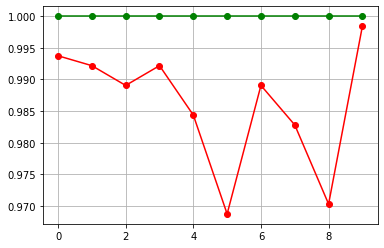

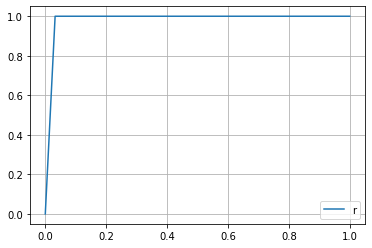

0.9838709677419355
[[30  1]
 [ 0 49]]


In [ ]:
clf1=tunning_random_forest(xtrain,ytrain)
learning_graph(clf1,xtrain,ytrain)
pred1=clf1.predict(xtest)
roc_c(ytest,pred1)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred1)
print(auc)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred1))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features='auto', max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')


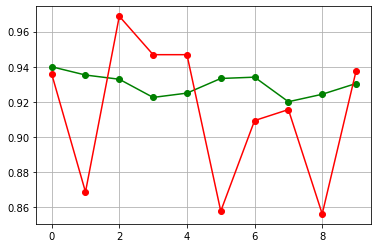

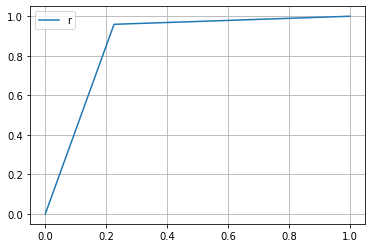

0.8666886109282422
[[24  7]
 [ 2 47]]


In [ ]:
clf2=tunning_decision_tree(xtrain,ytrain)
learning_graph(clf2,xtrain,ytrain)
pred2=clf2.predict(xtest)
roc_c(ytest,pred2)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred2)
print(auc)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred2))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=5, shrinking=True, tol=0.001,
    verbose=False)


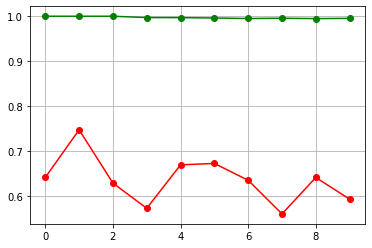

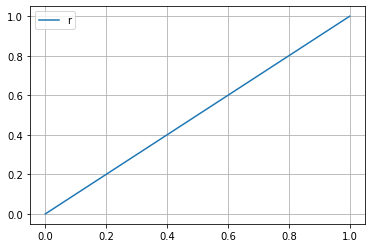

0.5

In [ ]:
clf3=tunning_svm(xtrain,ytrain)
learning_graph(clf3,xtrain,ytrain)
pred3=clf3.predict(xtest)
roc_c(ytest,pred3)
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred3)
auc

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred3))

[[ 0 31]
 [ 0 49]]
